<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/week2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 exercise

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# read in the data
data = np.genfromtxt('/content/drive/MyDrive/EAS2655_4821/boston.csv',
                     delimiter=',',skip_header=1)

In [36]:
# extract January temperature
Year=data[:,0]
Jan =data[:,1]
#
gooddata = Jan > -100
goodJan=Jan[gooddata]
goodYear=Year[gooddata]

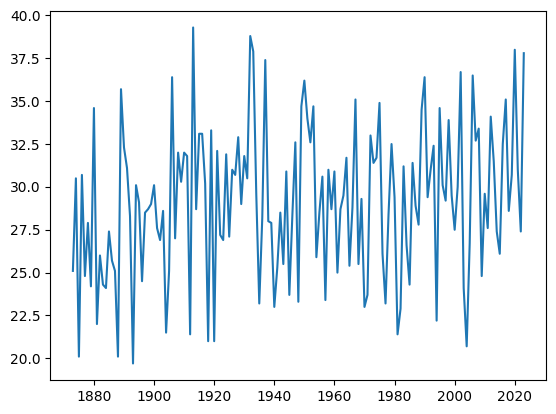

In [37]:
# plot and have a look at the data
plt.plot(goodYear,goodJan)

In [38]:
# calculate mean and standard deviation
mu = np.mean(goodJan)
std= np.std(goodJan)
#
# display the values
print('mean = '+str(mu)[:4]+' deg F')
print('std = '+str(std)[:4]+' deg F')

mean = 29.1 deg F
std = 4.37 deg F


### (1) Extract 10 years randomly and calculate the distrubtion of sample means.

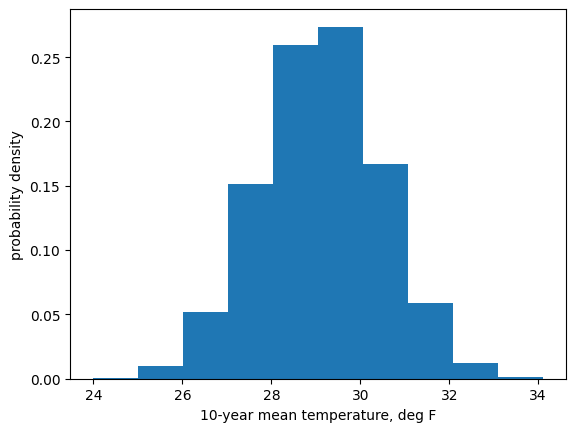

In [39]:
# repeat sampling
K = 10000
# initialize an array for sample mean
M = np.zeros(K)
# for loop to generate distrubtion
for i in range(K):
    sample = np.random.choice(goodJan,10,replace=False)
    M[i] = np.mean(sample)
#
# plot histogram
plt.hist(M,density=True)
plt.xlabel('10-year mean temperature, deg F')
plt.ylabel('probability density')
plt.show()

### Calculation of standard error

In [40]:
# SE = std/sqrt(N)
SE = std/np.sqrt(10)
print('Standard Error = '+str(SE)[:4]+' deg F')

Standard Error = 1.38 deg F


In [41]:
Mstd = np.std(M)
print('Standard deviation of M = '+str(Mstd)[:4]+' deg F')

Standard deviation of M = 1.35 deg F


### Calculate percentiles

In [42]:
pct95 = np.percentile(M,95)
print('95 percentile temperature = '+str(pct95)[:4]+' deg F')

95 percentile temperature = 31.3 deg F


In [43]:
# average for the last 10 good years
last10 = np.mean(goodJan[-10:])
print('Jan temperature (2014-2023) = '+str(last10)[:4]+' deg F')

Jan temperature (2014-2023) = 31.4 deg F


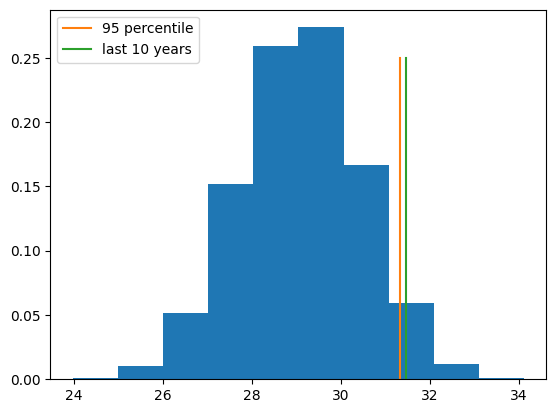

In [44]:
plt.hist(M,density=True)
plt.plot([pct95,pct95],[0, .25],label='95 percentile')
plt.plot([last10,last10],[0, .25],label='last 10 years')
plt.legend()
plt.show()

Bla bla